In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('robot_inverse_kinematics_dataset.csv')

In [4]:
data.head()

q1     q2    q3     q4      q5     q6       x       y      z
0 -1.51 -0.763  1.85 -0.817  0.9120  2.320 -0.0947  0.1500  0.301
1 -2.84  0.520  1.58 -1.270 -1.3900  0.617  0.1420 -0.1000  0.225
2 -1.23  0.695  1.22 -1.130  0.0343  6.270 -0.0833  0.2230  0.206
3 -1.99  1.060  1.74 -1.760 -1.2400  4.760  0.1350 -0.0314  0.370
4  1.05  0.836  1.34 -1.890  0.4840  4.380 -0.0560 -0.2290  0.260

In [5]:
data.tail()

q1     q2    q3    q4     q5    q6       x        y      z
14995  0.314 -0.534  1.76  1.97 -0.699  3.87 -0.1130 -0.12800  0.257
14996  2.450  1.360  1.55  2.78 -0.321  5.31  0.0633 -0.03160  0.450
14997  2.620  1.410  1.56  2.54  1.060  5.87  0.1310 -0.16000  0.362
14998 -1.890  1.850  1.51  1.09  0.697  4.07  0.0829 -0.01600  0.441
14999  2.680 -1.790  1.79  2.62  1.590  2.64 -0.1570 -0.00369  0.254

In [6]:
data.isna().sum()

q1    0
q2    0
q3    0
q4    0
q5    0
q6    0
x     0
y     0
z     0
dtype: int64

In [7]:
data.iloc[0]

q1   -1.5100
q2   -0.7630
q3    1.8500
q4   -0.8170
q5    0.9120
q6    2.3200
x    -0.0947
y     0.1500
z     0.3010
Name: 0, dtype: float64

# TASK 1-: EDA ANALYSIS

<h2>TASK 1.a</h2>

In [8]:
# Generate random joint values within the defined ranges for each joint variable in radian
q1 = np.random.uniform(-1.5708,1.5708)
q2 = np.random.uniform(-0.8727,1.9199)
q3 = np.random.uniform(-2.7925,-0.0698)
q4 = np.random.uniform(-3.1416,3.1416)
q5 = np.random.uniform(-0.0175,3.7525)
q6 = np.random.uniform(-3.1416,3.1416)
print("Joint values (q1, q2, q3, q4, q5, q6):", q1, q2, q3, q4, q5, q6)

Joint values (q1, q2, q3, q4, q5, q6): 0.36689983922219604 -0.6560313619400886 -1.4316799404761478 -0.05832135893679258 2.6553021796544196 -2.4891302935812787


<font size="4"> <span style = "color:green ; font-family: Garamond, Courier New">**Values q1, q2, q3, q4, q5, and q6 are uniformely randomly generated using Python numpy.random.uniform module. This line generates a random value for q1 using the np.random.uniform function. The function takes two arguments: the lower bound (-1.5708 in this case) and the upper bound (1.5708). The function returns a random floating-point number within the specified range, and that value is assigned to q1 and similarly for q2,q3,q4,q5,q6.**</span>

<h2>TASK 1.b</h2>

In [9]:
# Joint values
q1 == -1.51, q2 == -7.63, q3 == 1.85, q4 == -8.17, q5 == 9.12, q6 == 2.32

# DH parameters
theta = np.array([0,np.pi/2, 0, np.pi/2, -np.pi/2, np.pi/2])
a = np.array([0.1, 0.3, 0.15, 0, 0, 0])
b = np.array([0.2, 0, 0, 0.25, 0, 0])

# Homogeneous transformation matrix
def trans(theta, a, b, q):
    cos_q = np.cos(q)
    sin_q = np.sin(q)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    T = np.array([
        [cos_q, -sin_q*cos_theta, sin_q*sin_theta, a*cos_q],
        [sin_q, cos_q*cos_theta, -cos_q*sin_theta, a*sin_q],
        [0, sin_theta, cos_theta, b],
        [0, 0, 0, 1]
    ])

    return T

# Calculate overall transformation matrix
T = np.eye(4)
for i in range(6):
    T_i = trans(theta[i], a[i], b[i], eval(f'q{i+1}'))
    T = np.matmul(T, T_i)

# Extract position (x, y, z) from the transformation matrix
position = T[:3, 3]

# Print results
print("End-effector Position:" , position)

End-effector Position: [ 0.32954881 -0.29521716  0.05144916]


<font size="4"> <span style = "color:green ; font-family: Garamond, Courier New">**The position of the robot's end-effector (x,y,z) based on the given joint angles are calculated based on the direct kinematics model obtained through Denavit-Hartenberg operation. The Denavit-Hartenberg (DH) convention is used to describe the kinematic relationships between different joints in the robot manipulator. Forward kinematics calculates the position and orientation of the end-effector based on the known joint angles. The code follows a loop that iterates over each joint angle, calculates the transformation matrix for that joint, and accumulates the transformations to determine the final position of the end-effector.**</span>

<h2>TASK 1.c</h2>

In [10]:
import numpy as np

# Joint values
q1 == -1.51, q2 == -7.63, q3 == 1.85, q4 == -8.17, q5 == 9.12, q6 == 2.32

# DH parameters
theta = np.array([0,np.pi/2, 0, np.pi/2, -np.pi/2, np.pi/2])
a = np.array([0.1, 0.3, 0.15, 0, 0, 0])
b = np.array([0.2, 0, 0, 0.25, 0, 0])

# Set the joint angles
q = np.array([q1, q2, q3, q4, q5, q6])

# Transformation matrices
T = []

# Forward kinematics
for i in range(6):
    ct = np.cos(q[i])
    st = np.sin(q[i])
    ca = np.cos(theta[i])
    sa = np.sin(theta[i])
    A = np.array([
        [ct, -st*ca, st*sa, a[i]*ct],
        [st, ct*ca, -ct*sa, a[i]*st],
        [0, sa, ca, b[i]],
        [0, 0, 0, 1]
    ])
    if i == 0:
        T.append(A)
    else:
        T.append(T[i-1] @ A)

# Cartesian coordinates of the end effector
x = T[5][0, 3]
y = T[5][1, 3]
z = T[5][2, 3]

# Print the Cartesian coordinates
print("Cartesian Coordinates:")
print("x =", x)
print("y =", y)
print("z =", z)

# Sensitivity analysis
sensitivities = []

perturbation = 0.001  # Small perturbation to joint variable

for i in range(6):
    q_perturbed = np.copy(q)
    q_perturbed[i] += perturbation

    T_perturbed = []

    for j in range(6):
        ct = np.cos(q_perturbed[j])
        st = np.sin(q_perturbed[j])
        ca = np.cos(theta[j])
        sa = np.sin(theta[j])
        A = np.array([
            [ct, -st*ca, st*sa, a[j]*ct],
            [st, ct*ca, -ct*sa, a[j]*st],
            [0, sa, ca, b[j]],
            [0, 0, 0, 1]
        ])
        if j == 0:
            T_perturbed.append(A)
        else:
            T_perturbed.append(T_perturbed[j-1] @ A)

    dx = T_perturbed[5][0, 3] - T[5][0, 3]
    dy = T_perturbed[5][1, 3] - T[5][1, 3]
    dz = T_perturbed[5][2, 3] - T[5][2, 3]

    sensitivities.append((dx / perturbation, dy / perturbation, dz / perturbation))

# Print the sensitivities
print("Sensitivities:")
for i, sensitivity in enumerate(sensitivities):
    dx, dy, dz = sensitivity
    print(f"Joint {i+1}:")
    print("dx =", dx)
    print("dy =", dy)
    print("dz =", dz)
    print()

Cartesian Coordinates:
x = 0.3295488095368141
y = -0.2952171571234079
z = 0.05144916322477762
Sensitivities:
Joint 1:
dx = 0.29505233352949967
dy = 0.3296963631782557
dz = 0.0

Joint 2:
dx = 0.3309713331618447
dy = 0.23636992195141815
dz = 0.0

Joint 3:
dx = 0.14237477526873876
dy = -0.04235182803352666
dz = 0.02087448572760109

Joint 4:
dx = 0.0
dy = 0.0
dz = 0.0

Joint 5:
dx = 0.0
dy = 0.0
dz = 0.0

Joint 6:
dx = 0.0
dy = 0.0
dz = 0.0



<font size="4"> <span style = "color:green ; font-family: Garamond, Courier New">**In a typical serial manipulator with a 6-degree-of-freedom (DOF) configuration, the joint variables q1, q2, and q3 usually have a direct impact on the end-effector's position in Cartesian space, while q4, q5, and q6 primarily affect its orientation.
The code calculate the forward kinematics and visualize the impact of joint variables on the Cartesian coordinates by using the Denavit-Hartenberg (DH) parameters.**</span>

<h2>TASK 1.d</h2>

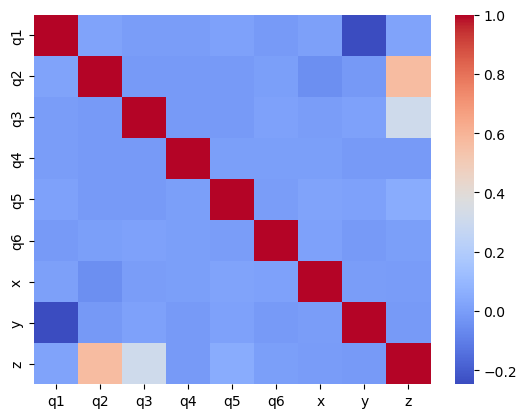

<Figure size 2500x1500 with 0 Axes>

In [11]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# import file with data
data = pd.read_csv("robot_inverse_kinematics_dataset.csv")
  
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
# print(data.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap='coolwarm')
plt.figure(figsize=(25,15))
  
# displaying heatmap
mp.show()

<font size="4"> <span style = "color:green ; font-family: Garamond, Courier New">**It's showing clearly that no features are directly or inversely related. There might be another relation among them. For that we will try to analyze each them pairwise using seaborn pairplot.**</span>

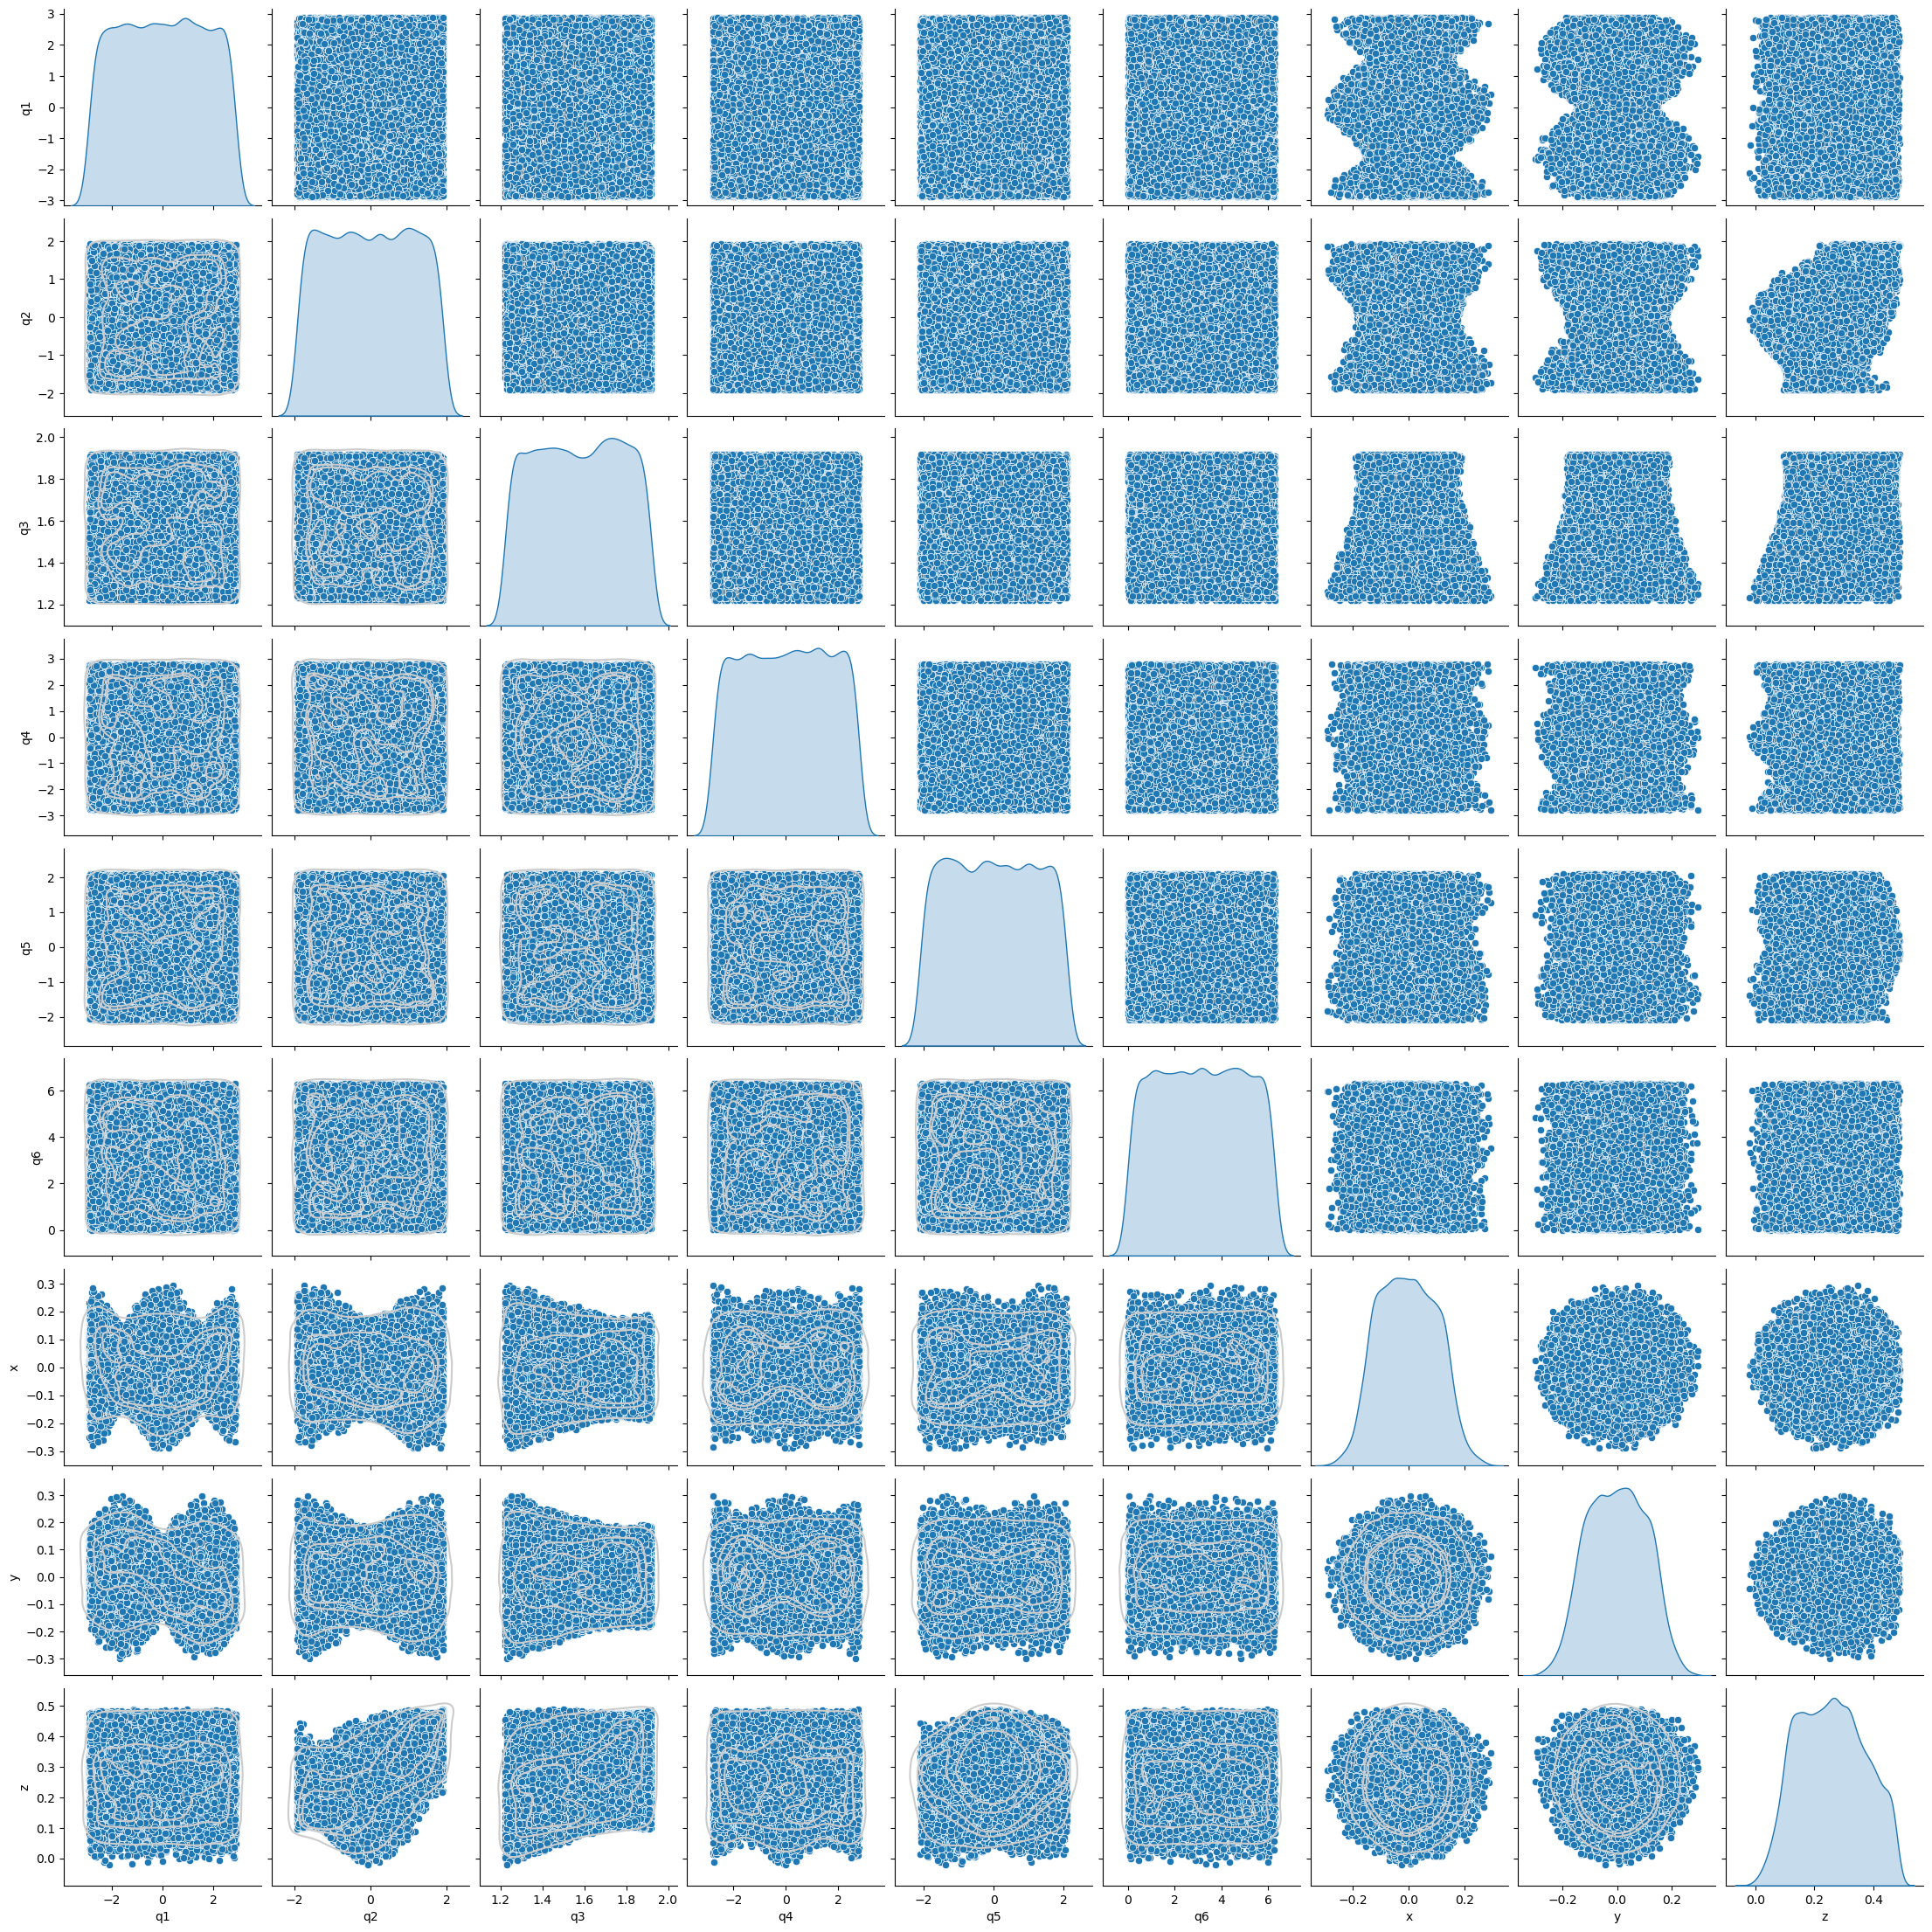

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
exercise = pd.read_csv("robot_inverse_kinematics_dataset.csv")
exercise.head()
g = sns.pairplot(exercise, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".8")
plt.show()

<font size="4"> <span style = "color:green ; font-family: Garamond, Courier New">**SNS.pairplot(exercise)<br>
Now this function has alot of parameters. We will try some of them and try to analyze the results simply and note down the insights.**</span>

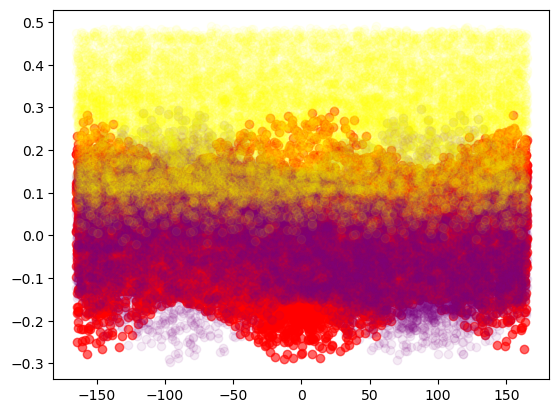

In [13]:
plt.scatter(np.degrees(data['q1']),data['x'],alpha = 0.6, c='red')
plt.scatter(np.degrees(data['q1']),data['y'],alpha = 0.08, c='purple')
plt.scatter(np.degrees(data['q1']),data['z'],alpha = 0.05, c='yellow')
plt.show()

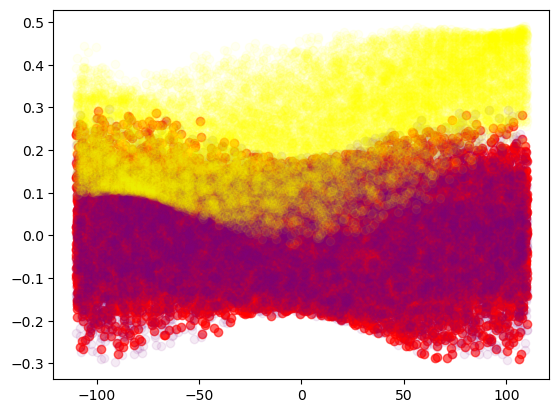

In [14]:
plt.scatter(np.degrees(data['q2']),data['x'],alpha = 0.6, c='red')
plt.scatter(np.degrees(data['q2']),data['y'],alpha = 0.08, c='purple')
plt.scatter(np.degrees(data['q2']),data['z'],alpha = 0.05, c='yellow')
plt.show()

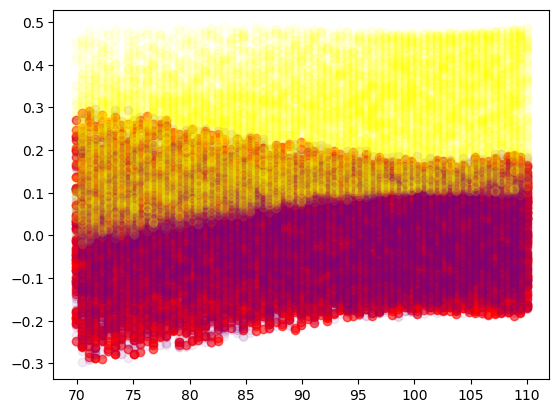

In [15]:
plt.scatter(np.degrees(data['q3']),data['x'],alpha = 0.6, c='red')
plt.scatter(np.degrees(data['q3']),data['y'],alpha = 0.08, c='purple')
plt.scatter(np.degrees(data['q3']),data['z'],alpha = 0.05, c='yellow')
plt.show()

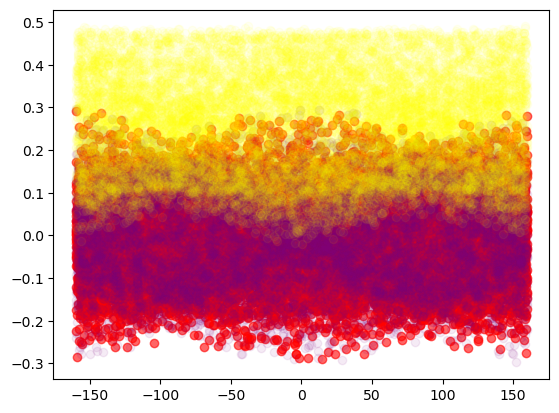

In [16]:
plt.scatter(np.degrees(data['q4']),data['x'],alpha = 0.6, c='red')
plt.scatter(np.degrees(data['q4']),data['y'],alpha = 0.08, c='purple')
plt.scatter(np.degrees(data['q4']),data['z'],alpha = 0.05, c='yellow')
plt.show()

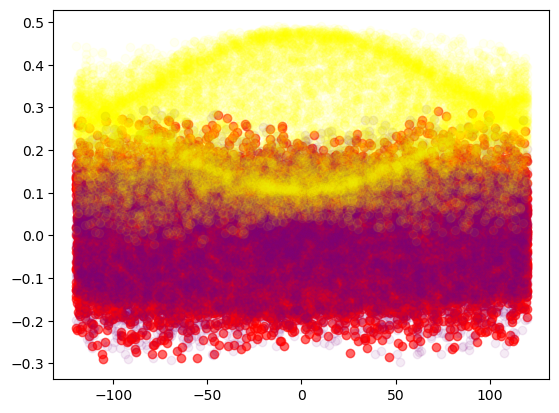

In [17]:
plt.scatter(np.degrees(data['q5']),data['x'],alpha = 0.6, c='red')
plt.scatter(np.degrees(data['q5']),data['y'],alpha = 0.08, c='purple')
plt.scatter(np.degrees(data['q5']),data['z'],alpha = 0.05, c='yellow')
plt.show()

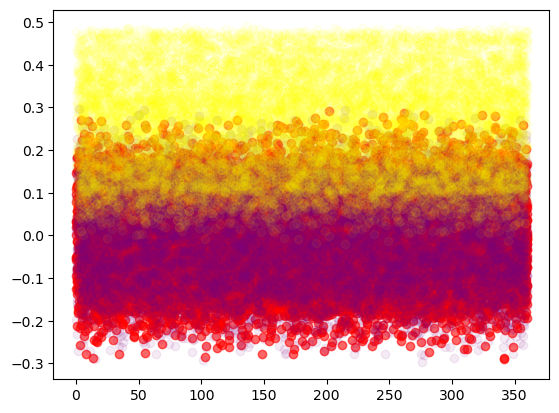

In [18]:
plt.scatter(np.degrees(data['q6']),data['x'],alpha = 0.6, c='red')
plt.scatter(np.degrees(data['q6']),data['y'],alpha = 0.08, c='purple')
plt.scatter(np.degrees(data['q6']),data['z'],alpha = 0.05, c='yellow')
plt.show()

<h2>TASK 1.e</h2>

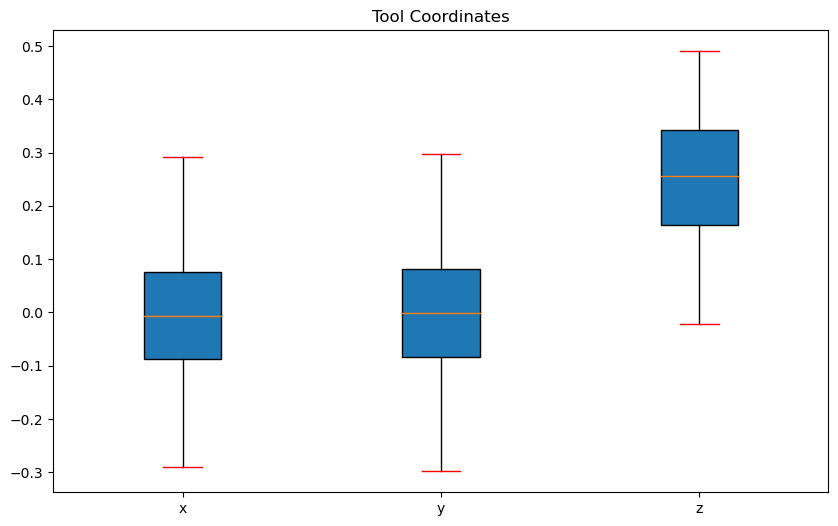

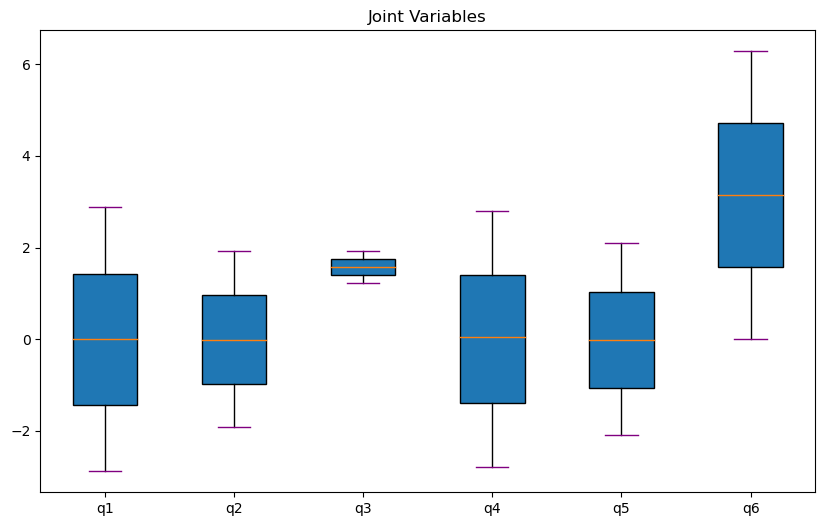

In [19]:
# Extract the joint variables and the corresponding coordinates
joint_variables = data[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']]
coordinates = data[['x', 'y', 'z']]

# Create box plots for coordinates
plt.figure(figsize=(10, 6))
plt.boxplot(coordinates.values, labels=coordinates.columns,patch_artist=True,capprops=dict(color="red"))
plt.title('Tool Coordinates')
plt.show()

# Create box plots for joint variables
plt.figure(figsize=(10, 6))
plt.boxplot(joint_variables.values, labels=joint_variables.columns,patch_artist=True,capprops=dict(color="purple"))
plt.title('Joint Variables')
plt.show()

<font size="4"> <span style = "color:green ; font-family: Garamond, Courier New">**The provided box plots of joint values and their corresponding Cartesian coordinates do not show any unusual or extreme values. There are no clear patterns or anomalies observed in the distribution of the data points.**</span>

# TASK 2-: Classification/Regression

In [20]:
data.head(15)

q1     q2    q3     q4      q5     q6        x       y      z
0  -1.5100 -0.763  1.85 -0.817  0.9120  2.320 -0.09470  0.1500  0.301
1  -2.8400  0.520  1.58 -1.270 -1.3900  0.617  0.14200 -0.1000  0.225
2  -1.2300  0.695  1.22 -1.130  0.0343  6.270 -0.08330  0.2230  0.206
3  -1.9900  1.060  1.74 -1.760 -1.2400  4.760  0.13500 -0.0314  0.370
4   1.0500  0.836  1.34 -1.890  0.4840  4.380 -0.05600 -0.2290  0.260
5   0.7620 -0.717  1.86  1.250  0.4770  6.110 -0.16800 -0.0712  0.245
6  -0.0943 -1.010  1.35  2.370 -0.6350  4.870  0.00422 -0.0616  0.120
7  -1.3800  1.390  1.34 -2.530  0.6260  3.610 -0.09540  0.2350  0.355
8   2.7500 -0.358  1.65 -1.480 -1.2800  3.170 -0.00242 -0.1500  0.209
9  -1.4200 -0.747  1.28 -0.146 -1.0300  0.128  0.04480 -0.1690  0.049
10 -1.4500  0.275  1.48  0.886  0.0866  1.920 -0.01370  0.1920  0.238
11 -1.3500 -1.710  1.90 -0.820  0.8200  1.580 -0.10200  0.0977  0.164
12  2.7500  1.160  1.73 -1.540 -1.0900  3.300  0.00315 -0.1420  0.382
13 -0.6270  1.540  1.35 -1.510 -0.3720  3.730 -0.10700  0.1430  0.427
14 -1.6100  0.948  1.49 -1.740  1.1500  6.270 -0.12700  0.1530  0.286

In [21]:
data.shape

(15000, 9)

In [22]:
data.dtypes

q1    float64
q2    float64
q3    float64
q4    float64
q5    float64
q6    float64
x     float64
y     float64
z     float64
dtype: object

# REGRESSION MODEL 

<font size="4"> <span style = "color:green ; font-family: Garamond, Courier New">**Mean Squared Error (MSE): The mean squared error measures the average squared difference between the predicted values and the true values. It provides an indication of the model's accuracy. A lower MSE indicates better performance.<br>Mean Absolute Error (MAE): The mean absolute error calculates the average absolute difference between the predicted values and the true values. It represents the average magnitude of the errors made by the model. Smaller MAE values indicate better performance.<br>R-squared (R2): The R-squared value represents the proportion of the variance in the target variable that can be explained by the model. It measures how well the model fits the data. R2 ranges from 0 to 1, with a higher value indicating a better fit.**</span>

In [23]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reading a CSV file named 'robot_inverse_kinematics_dataset.csv' containing the dataset
data = pd.read_csv('robot_inverse_kinematics_dataset.csv')

# Handle missing values if any
data = data.dropna()

# Spliting the dataset into train-test
from sklearn.model_selection import train_test_split

# Spliting the dataset into input features (A) and target variable (B)
A = data[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']]
B = data[['x', 'y', 'z']]

# Spliting into train and test sets (80:20 ratio)
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

# Selection of a Model
from sklearn.linear_model import LinearRegression

# Chooing a linear regression model
model = LinearRegression()

# Training a Model
model.fit(A_train, B_train)

# Making predictions on test set
B_pred = model.predict(A_test)

# Calculating the evaluation metrics
mse = mean_squared_error(B_test, B_pred)
mae = mean_absolute_error(B_test, B_pred)
r2 = r2_score(B_test, B_pred)

# Summarize Model's Performance
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.009425953346110067
Mean Absolute Error (MAE): 0.08079641932734688
R-squared (R2): 0.16201432973907004


<font size="4"> <span style = "color:green ; font-family: Garamond, Courier New">**The provided code demonstrates the process of training a linear regression model on a given dataset and evaluating its performance using several metrics. The linear regression model is trained using the training data (A_train and B_train). The model's performance is then evaluated by making predictions on the test data (A_test) and comparing them with the true values (B_test). The evaluation metrics (MSE, MAE, and R2) are calculated using the predicted values (B_pred) and the true values. Finally, the metrics are printed to summarize the model's performance.**</span>